In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# plot to show convergency
def plotw(x, y,a,b):
    plt.axis([min(x)*0.9, max(x)*1.1,min(y)*0.9,max(y)*1.1])
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(x, y)
    plt.show()

#draw map
def histgram(data,title,file_name):
    n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)

    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.savefig('SGA')

def desityfun0(data):
    fig, ax = plt.subplots()
    data.plot.kde(ax=ax, legend=False, title='desity function')
    data.plot.hist(density=False, legend = False, ax=ax)
    ax.set_ylabel('Probability')
    ax.grid(axis='y')
    ax.set_facecolor('#d8dcd6')
    plt.show()
    plt.savefig('books_read.png')

def desityfun(x, ax0numer,axi1number):
    fig,(ax0,ax1) = plt.subplots(nrows=2,figsize=(9,6))
    ax0.hist(x,ax0numer,density=1,histtype='bar',facecolor='yellowgreen',alpha=0.75)
    ax0.set_title('pdf')
    ax1.hist(x,axi1number,densityj=1,histtype='bar',facecolor='pink',alpha=0.75,cumulative=True,rwidth=0.8)
    ax1.set_title("cdf")
    fig.subplots_adjust(hspace=0.4)
    plt.show()

def errorcount(S_Amt, S_Atf): #S_Am, S_Atf
    cutlist = list()
    recalllist = list()
    scountlist = list()
    acountlist = list()
    for i in range(101):
        S_Adt = deepcopy(S_Atf)
        S_Adt[S_Adt >= (i/100)] = 1
        S_Adt[S_Adt < (i/100)] = 0

        error = np.sum((S_Adt - S_Amt) ** 2)
        errors = np.sum((S_Adt - S_Amt) ** 2, axis=1)
        accuracy = 1 - error / S_Amt.shape[0]
        accuracys = 1 - errors / S_Amt.shape[1]

        h1 = S_Adt + S_Amt
        h1[h1 < 1.5] = 0
        TP = np.sum(h1)

        h2 = S_Adt - S_Amt
        h2[h2 < 0.5] = 0
        FP = np.sum(h2)

        h3 = S_Amt - S_Adt
        h3[h3 < 0.5] = 0
        FN = np.sum(h3)

        e = 1
        precision = (TP+e) / (TP + FP + 2*e)
        recall = (TP+e) / (TP + FN + 2*e)
        F1 = 2 * precision * recall / (precision + recall)

        cutlist.append(i / 100)
        scountlist.append(np.sum(S_Adt, axis=1))  # for each sample, #SGA
        acountlist.append(np.sum(S_Adt, axis=0))  # for each SGA, #sample
        recalllist.append(recall)
    recall = turn(recalllist, 101, 1)
    recall.columns = range(101)
    scount = turn(scountlist, 101, 1)
    scount.columns = range(101)
    acount = turn(acountlist, 101, 1)
    acount.columns = range(101)
    return cutlist, scount, acount, recall

def plotw(cutlist, scount, acount, recall):
    recallmean = np.mean(recall,axis=0)
    plotw(cutlist, recallmean, 'Cut valve', 'Recall')
    acountmean = np.mean(acount,axis=0)
    plotw(cutlist, acountmean, 'Cut valve', 'Average Sample count per SGA')
    scountmean = np.mean(scount,axis=0)
    plotw(cutlist, scountmean, 'Cut valve', 'Average SGA count per Sample')
    plotw(scountmean, recallmean, 'Average Sample count per SGA', 'Recall')

In [55]:
data0 = pd.read_csv('S_Am/Input/S_Am.csv', header=0, index_col=0)
data = np.sum(data0)

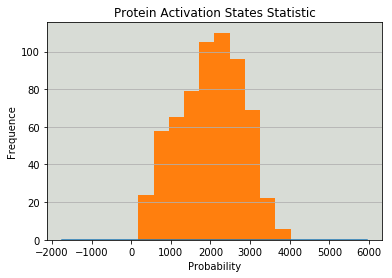

In [37]:
    fig, ax = plt.subplots()
    data.plot.kde(ax=ax, legend=False, title='Protein Activation States Statistic')
    data.plot.hist(density=False, legend =False, ax=ax)
    ax.set_ylabel('Frequence')
    ax.set_xlabel('Probability')
    ax.grid(axis='y')
    ax.set_facecolor('#d8dcd6')
    plt.savefig('boo_read.png')

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


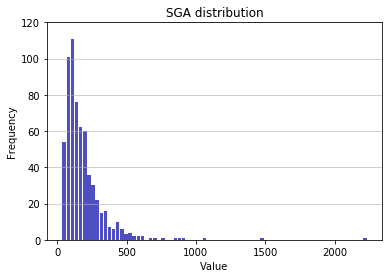

In [56]:
histgram(data,'SGA distribution','SGA1 count')